<a href="https://colab.research.google.com/github/victoriousvictor42/titanic/blob/master/titanicANDspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> make a prediction of the titanic disaster using K-nearest Neighbour classifier and detecting spam messages using Naive Bayes Classifier

### b) Defining the Metric for Success

*   Data understanding 
*   Data Wrangling
*   Feature engineering
*   Modelling using K-nearest neighbour classifier and Naive Bayes classifier



### c) Understanding the context 

making predictions using Knearest neighbours and naive bayes claasifier

### d) Recording the Experimental Design



1.   KNN
2.   Naive Bayes



### e) Data Relevance

these datasets are from kaggle. Its genuine since the samesame dataset were used in many hackathons.

## 2. Reading the Data

we are going to import the necessary libraries thatwill enable us to read the data.

In [0]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# loading the datasets
titanic = pd.read_csv('train.csv')
spambase = pd.read_csv('spambase.data')





## 3. Checking the Data

we are now going to see the layout of the data

In [4]:
# previewing the top of the datasets
print(titanic.head())
print('*'*200)
spambase.head()


   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
********************************************************************************************************************************************************************************************************


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
# checking for the number of records in the dataset
print(titanic.shape)
print('*'*200)
spambase.shape

(891, 12)
********************************************************************************************************************************************************************************************************


(4600, 58)



*   there are 891 rows and 12 labels in the titanic database
*   there are 4600 rows and 58 labels



In [6]:
# checking for the infomation about the datasets
print(titanic.info())
print('*'*200)
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
********************************************************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
0         4600 non-null float64
0.64      4600 non-null float64
0.64.1    4600 non-null float64
0.1   


*   there are 7 numerical datapoints and 5 categorical datapoints in titanic datasets

*   all of the datapoints in the spambase dataset are numerical, that is 58 datapoints



In [7]:
# checking the column names
print('titanic columns: ',titanic.columns)
print('*'*200)
print('spambase columns: ', spambase.columns)

titanic columns:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
********************************************************************************************************************************************************************************************************
spambase columns:  Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')


the titanic dataset has unstandardised naming. feature engineering should be done so as to get uniform column names 

## 5. Feature Engineering

In [0]:
# standardising the column names
titanic.columns = titanic.columns.str.lower()

we are going to remove some feature that are unnecessary in the titanic dataset

In [9]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.drop(['passengerid', 'ticket', 'name'], 1, inplace=True)

In [11]:
# checking for missing values
print(titanic.isnull().sum().sum())
print('*'*200)
spambase.isnull().sum().sum()


866
********************************************************************************************************************************************************************************************************


0

there are 866 missing data values in the titanic dataset while spambase has none

In [12]:
#focusing on the titanic dataset so that we can deal with the mising values
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

there are 117, 687 and 2 missing values in age, cabin and embarked features respectively

In [13]:
# we are going to fill the embarked feature with the most frequent data entry
mode = titanic.embarked.mode()
print (mode)

titanic.embarked.fillna('S', inplace=True)

0    S
dtype: object


we have filled embarked feature using the most frequent data entry

In [0]:
# for the cabin we are going to drop it
titanic.drop('cabin', 1, inplace=True)

The reason behind this is that cabin has a lot of miising data, 687/891. this is more than 50% of the data.

In [15]:
# AGE
# get the skewness of the feature
titanic.age.skew()


0.38910778230082704

the skew is positive. so we are going to fill it with the mean so that we can try and achieve symmetry 

In [0]:
titanic.age.fillna(titanic.age.median(),inplace= True)

In [17]:
# checking whether the null values have been dealt with successfully
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

all the missing data has been removed. Lets check for the duplicates

In [18]:
# duplicates
print(titanic.duplicated().sum())
print('*'*200)
spambase.duplicated().sum()


116
********************************************************************************************************************************************************************************************************


391

there are 111 and 391 duplicates in titanic and spambase datasets respectively

In [0]:
# droppping all the duplicates

titanic.drop_duplicates(inplace=True)
spambase.drop_duplicates(inplace=True)

In [20]:
# checking whether all the duplicates have been dropped
print(titanic.duplicated().sum())
print('*'*200)
spambase.duplicated().sum()


0
********************************************************************************************************************************************************************************************************


0

all of the duplicated data has been dropped. now we can head on and do some label encoding

In [0]:
# label encoding our data
from sklearn.preprocessing import LabelEncoder as LE

le = LE()

titanic.sex = le.fit_transform(titanic.sex)
titanic.embarked = le.fit_transform(titanic.embarked)

##**6.0 Exploratory Analysis - Titanic Dataset**

# Univariate Analysis

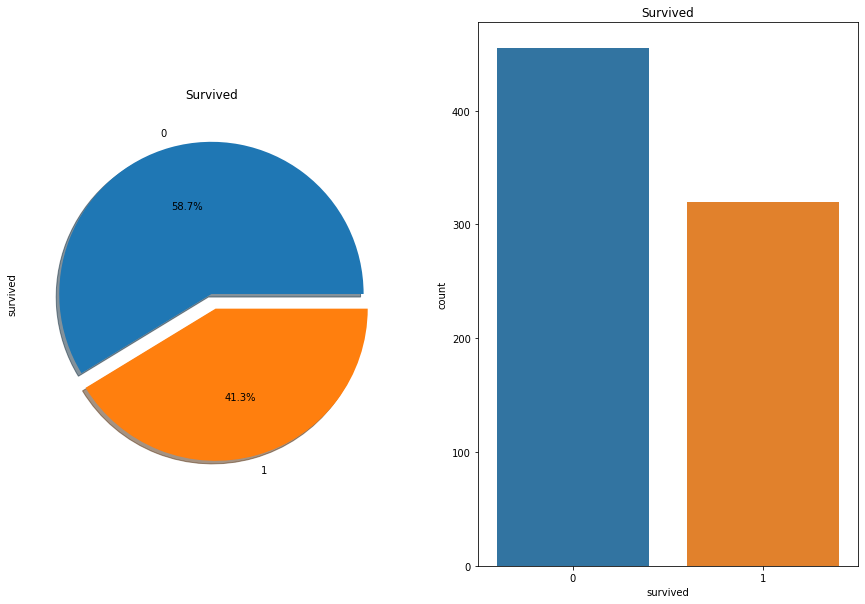

In [22]:
f, ax= plt.subplots(1,2, figsize=(15, 10))
titanic.survived.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Survived')
sns.countplot('survived', data=titanic)
ax[1].set_title('Survived')
plt.show()

the number of passengers who did not survive was more than those who did

3    401
1    210
2    164
Name: pclass, dtype: int64


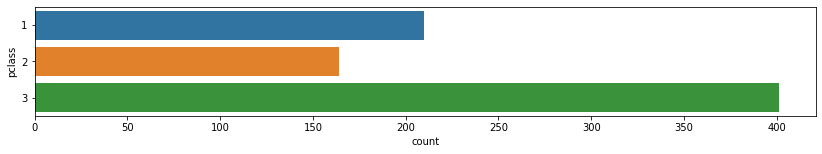

In [23]:
fig = plt.figure(figsize=(14,2))
sns.countplot(y='pclass', data=titanic)
print(titanic.pclass.value_counts())

most of the passengers who were on board were in class 3

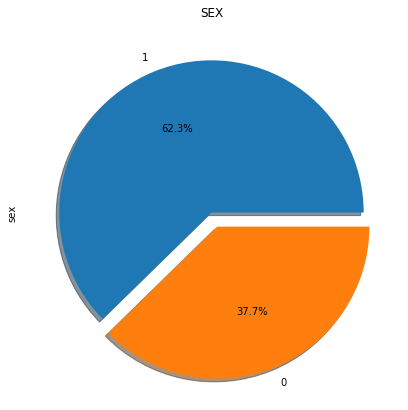

In [24]:
fig = plt.figure(figsize=(20,7))
titanic.sex.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('SEX')
plt.show()

male was labelled as 1, therefore the males who were on board the titanic were more than females.

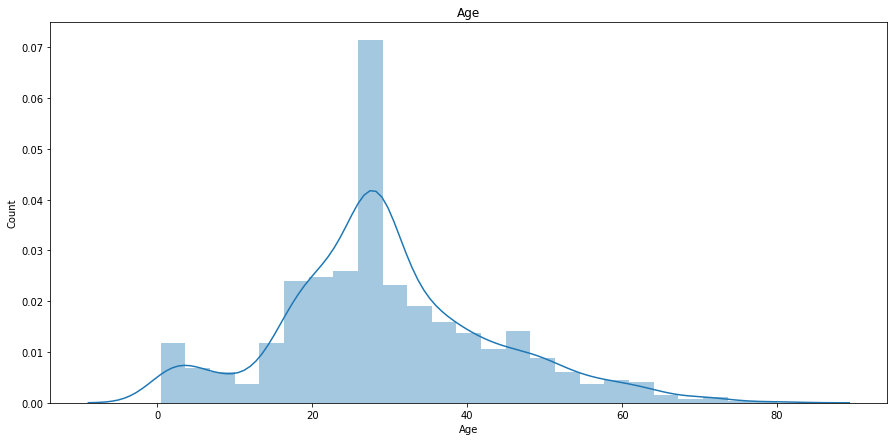

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(titanic.age)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most of the data is distributed between 20 and 40

0    508
1    201
2     27
4     18
3     14
5      5
8      2
Name: sibsp, dtype: int64


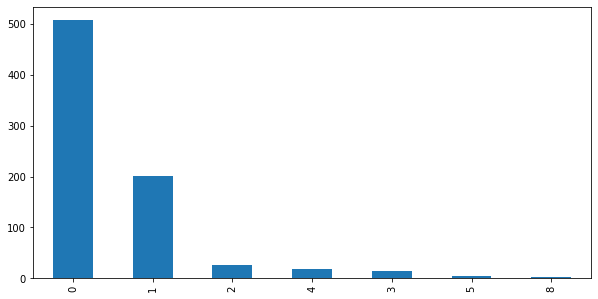

In [26]:
plt.figure(figsize=(10,5))
titanic.sibsp.value_counts().plot.bar()
print(titanic.sibsp.value_counts())
plt.show()

most of the passengers neither had a spouse nor a sibling.

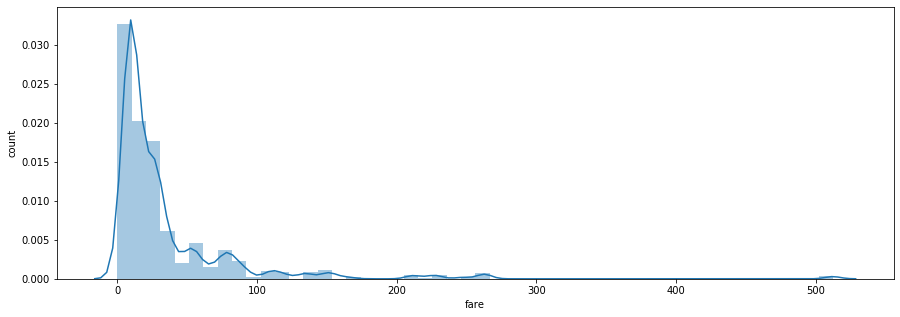

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(titanic.fare)
plt.xlabel('fare')
plt.ylabel('count')
plt.show()

most of the fare is distributed between 0 and 50

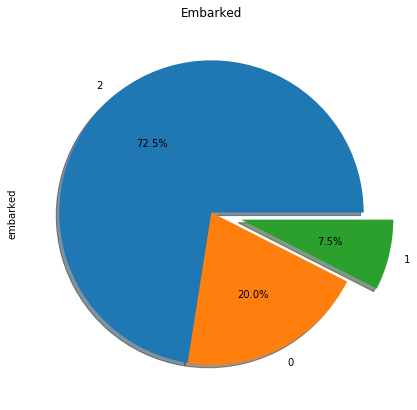

In [28]:
plt.figure(figsize=(15,7))
titanic.embarked.value_counts().plot.pie(explode=[0,0,0.2], autopct='%1.1f%%', shadow=True)
plt.title('Embarked')
plt.show()

most of the passengers who boarded the ship was at 2, which is southampton

**Bivariate Analysis**- Titanic



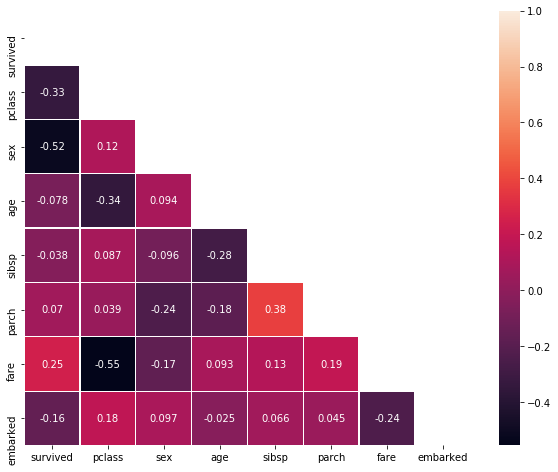

In [29]:
ship = titanic.corr()
mask = np.zeros_like(ship)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(ship, mask=mask, annot=True, linewidths=0.2, annot_kws={'size':10})
plt.show()

all of the features have a week corelation with the dependant variable, survived 

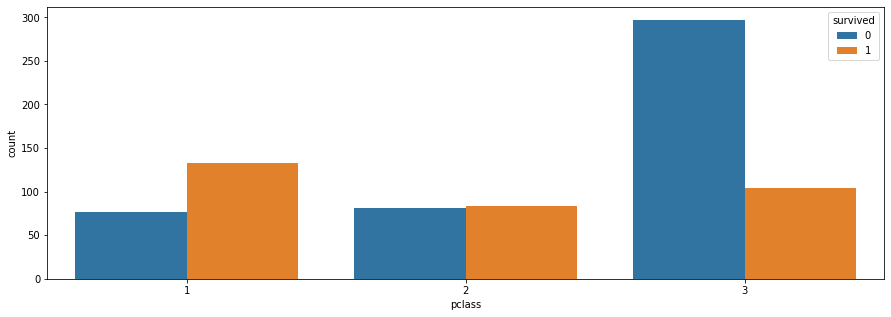

In [30]:
plt.figure(figsize=(15,5))
sns.countplot('pclass', hue='survived', data=titanic)
plt.show()




*   most of the passengers in third class did not survive
*   most of the passengers in the first class survived
*   there was equality in terms of servival in second class







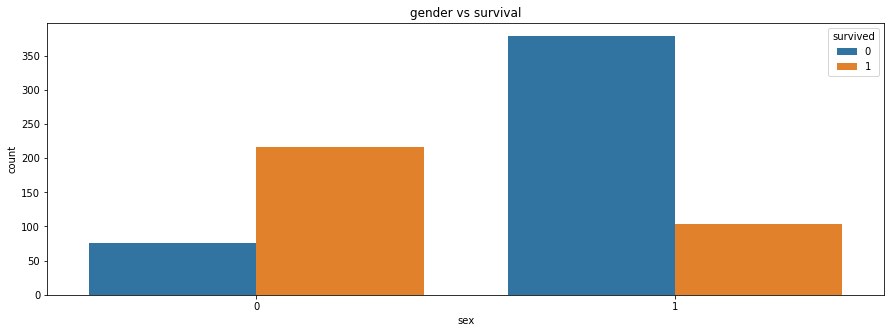

In [31]:
plt.figure(figsize=(15,5))
sns.countplot('sex', hue='survived', data=titanic)
plt.title('gender vs survival')
plt.show()




*   more males survied than those who did not.
*   more females did not survive compared to those who did.



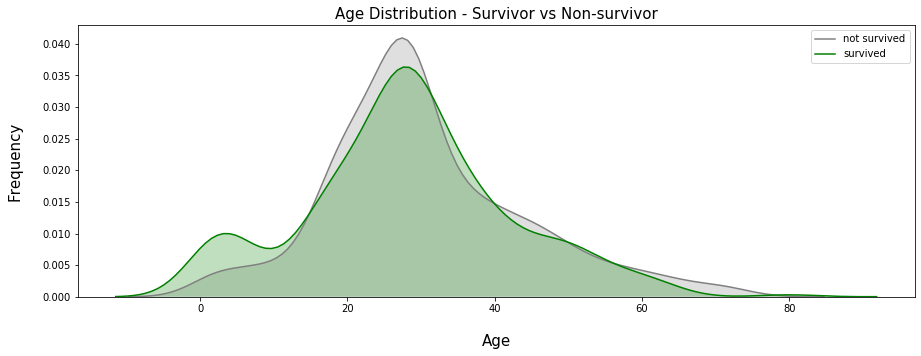

In [32]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(titanic.loc[(titanic['survived'] == 0), 'age'], color = 'gray', shade=True, label='not survived')
ax = sns.kdeplot(titanic.loc[(titanic['survived'] == 1), 'age'], color = 'g', shade=True, label='survived')
plt.title('Age Distribution - Survivor vs Non-survivor', fontsize=15)
plt.xlabel('Age', fontsize=15, labelpad=20)
plt.ylabel('Frequency', fontsize=15, labelpad=20)
plt.show()



*   there are more passengers who survived at the age between 0 to 10 than those who were unfortunate




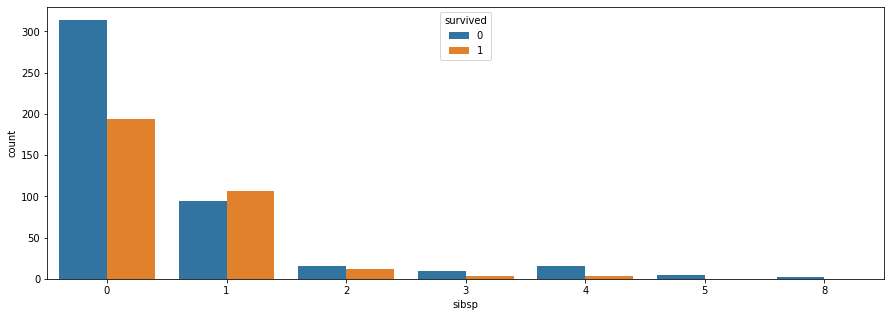

In [33]:
plt.figure(figsize=(15,5))
sns.countplot('sibsp', hue='survived', data=titanic)
plt.show()

most of the passengers who did not survive neither had a sibling nor a spouse

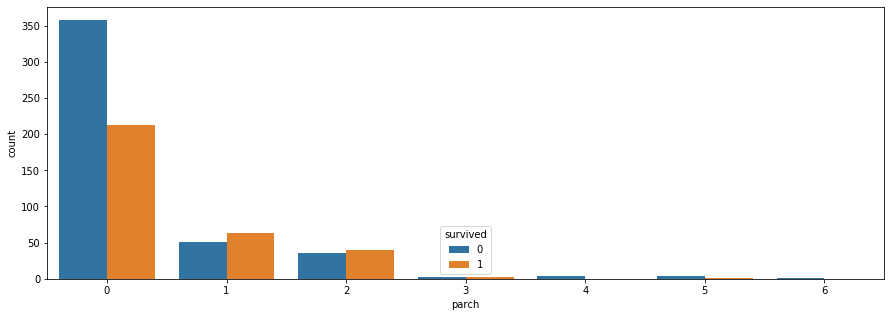

In [34]:
plt.figure(figsize=(15,5))
sns.countplot('parch', hue='survived', data=titanic)
plt.show()

many patients who did not survive were neither a parent nor a child than those who did.

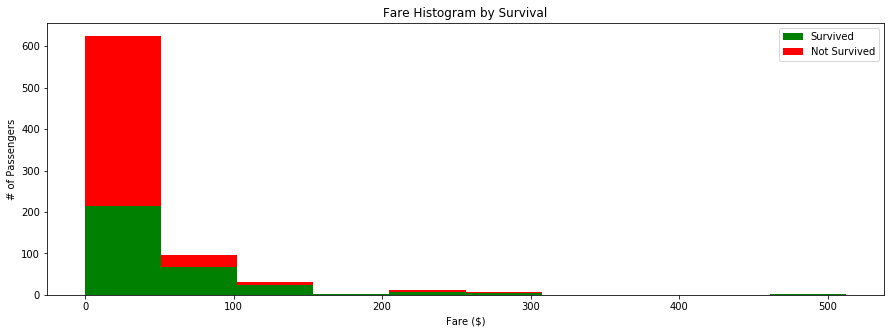

In [35]:
plt.figure(figsize=(15,5))
plt.hist(x = [titanic[titanic['survived']==1]['fare'], titanic[titanic['survived']==0]['fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Not Survived'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

most of the passengers paid there fare between the range of 0 to 50 and most of them did not survive.

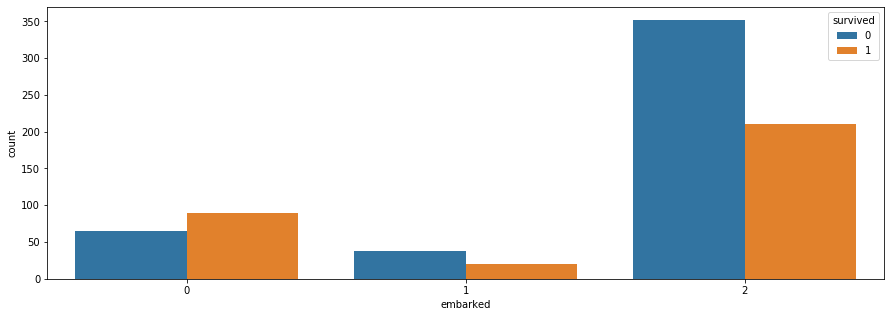

In [36]:
plt.figure(figsize=(15,5))
sns.countplot('embarked', hue='survived', data=titanic)
plt.show()

most of the passengers had boarded the ship at port 2, which is Southampton, where those passengers most of them did not survive

## 7. Modelling - Titanic

# **STEP 1**

**K-Nearest Neighbour**

In [0]:
# preparing the dataset
x = titanic.iloc[:,1:].values
y = titanic.survived.values

#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [0]:
# scaling the data
from sklearn.preprocessing import StandardScaler as SS

scaler = SS()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
# training the data
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# predictions
y_pred = classifier.predict(x_test)


In [41]:
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.7806451612903226

In [42]:
confusion_matrix(y_test, y_pred)

array([[74, 14],
       [20, 47]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        88
           1       0.77      0.70      0.73        67

    accuracy                           0.78       155
   macro avg       0.78      0.77      0.77       155
weighted avg       0.78      0.78      0.78       155



In [44]:
# splitting the titanic dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=0)

# scaling the data

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# traning the dataset
classifier.fit(x_train, y_train)

# making the prediction
y_pred2 = classifier.predict(x_test)

# checking for accuracy
print('Accuracy')
print(accuracy_score(y_test, y_pred2))
print('*'*200)

# checking the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred2))
print('*'*200)

# checking the classification report
print('Classification Report')
print(classification_report(y_test, y_pred2))

Accuracy
0.7682403433476395
********************************************************************************************************************************************************************************************************
Confusion Matrix
[[107  25]
 [ 29  72]]
********************************************************************************************************************************************************************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       132
           1       0.74      0.71      0.73       101

    accuracy                           0.77       233
   macro avg       0.76      0.76      0.76       233
weighted avg       0.77      0.77      0.77       233



In [45]:
# splitting the itanic dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.4, random_state=0)

# scaling the data

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# traning the dataset
classifier.fit(x_train, y_train)

# making the prediction
y_pred3 = classifier.predict(x_test)

# checking for accuracy
print('Accuracy:')
print(accuracy_score(y_test, y_pred3))
print('*'*200)

# checking the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred3))
print('*'*200)

# checking the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred3))

Accuracy:
0.7774193548387097
********************************************************************************************************************************************************************************************************
Confusion Matrix:
[[147  32]
 [ 37  94]]
********************************************************************************************************************************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       179
           1       0.75      0.72      0.73       131

    accuracy                           0.78       310
   macro avg       0.77      0.77      0.77       310
weighted avg       0.78      0.78      0.78       310



In [46]:
# splitting the itanic dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.5, random_state=0)

# scaling the data

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# traning the dataset
classifier.fit(x_train, y_train)

# making the prediction
y_pred4 = classifier.predict(x_test)

# checking for accuracy
print('Accuracy:')
print(accuracy_score(y_test, y_pred4))
print('*'*200)

# checking the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred4))
print('*'*200)

# checking the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred4))

Accuracy:
0.7989690721649485
********************************************************************************************************************************************************************************************************
Confusion Matrix:
[[195  33]
 [ 45 115]]
********************************************************************************************************************************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       228
           1       0.78      0.72      0.75       160

    accuracy                           0.80       388
   macro avg       0.79      0.79      0.79       388
weighted avg       0.80      0.80      0.80       388



## 8. Challenging the solution

## **Univariate Analysis - Spam Detection**

since the data dataset has a lot of feature. we will just go through some of the features to get an overview of how the data is spread.

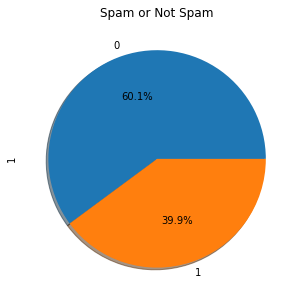

In [47]:
plt.figure(figsize=(10,5))
spambase['1'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Spam or Not Spam')
plt.show()


there are more spam data that not

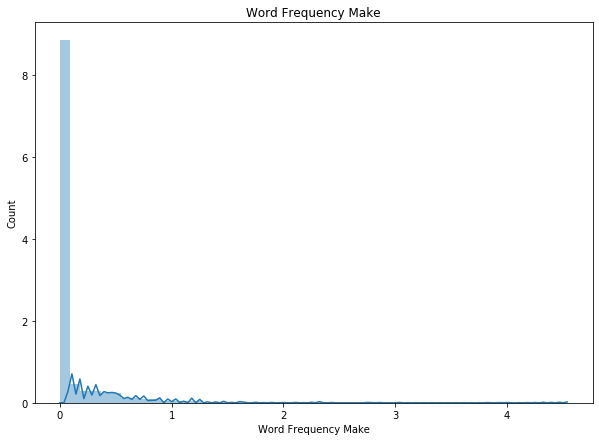

In [48]:
plt.figure(figsize=(10,7))
sns.distplot(spambase['0'])
plt.title('Word Frequency Make')
plt.xlabel('Word Frequency Make')
plt.ylabel('Count')
plt.show()

most of the data is distribiuted between 0 and 0.5

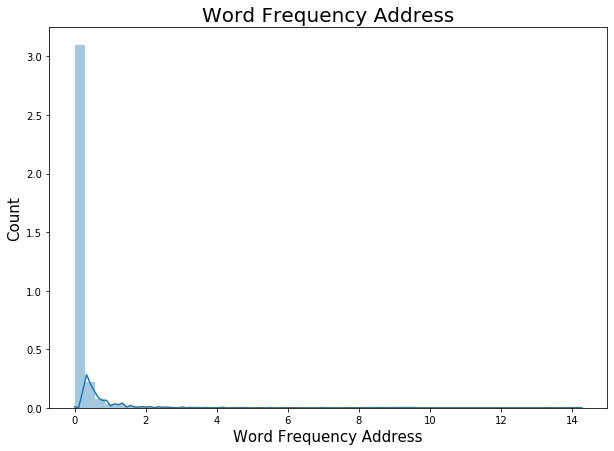

In [49]:
plt.figure(figsize=(10,7))
sns.distplot(spambase['0.64'])
plt.title('Word Frequency Address', fontsize=20)
plt.xlabel('Word Frequency Address', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

most of the data is distributed between 0 and 1.

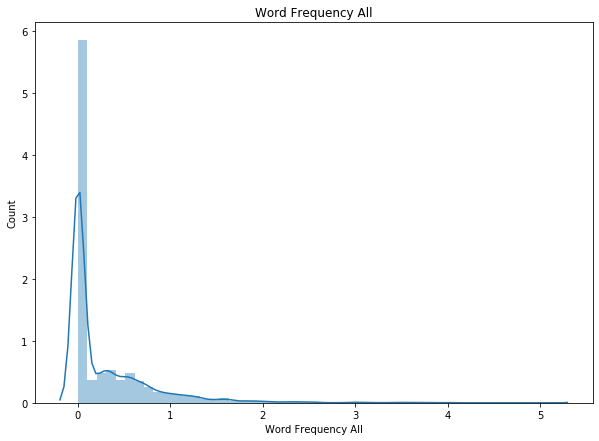

In [50]:
plt.figure(figsize=(10,7))
sns.distplot(spambase['0.64.1'])
plt.title('Word Frequency All')
plt.xlabel('Word Frequency All')
plt.ylabel('Count')
plt.show()

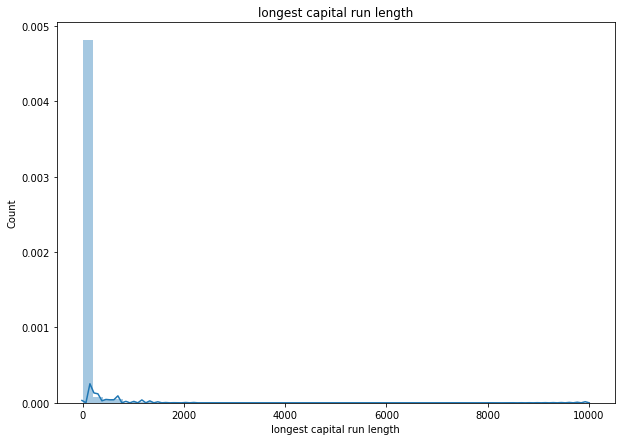

In [51]:
plt.figure(figsize=(10,7))
sns.distplot(spambase['61'])
plt.title('longest capital run length')
plt.xlabel('longest capital run length')
plt.ylabel('Count')
plt.show()

most of the data is distributed between 0 and 500

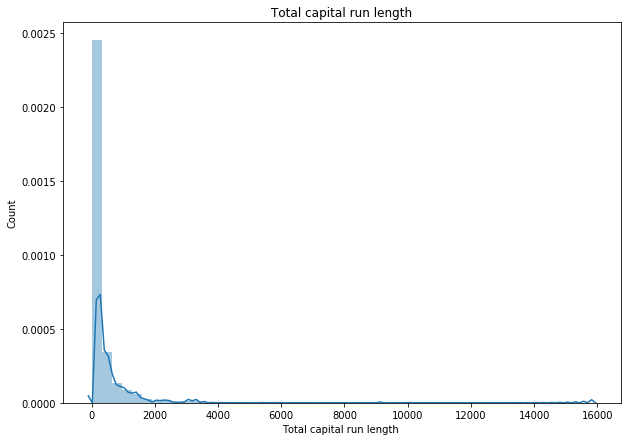

In [52]:
plt.figure(figsize=(10,7))
sns.distplot(spambase['278'])
plt.title('Total capital run length')
plt.xlabel('Total capital run length ')
plt.ylabel('Count')
plt.show()

most of the data is distibuted between 0 and 1000

## **Bivariate analysis**

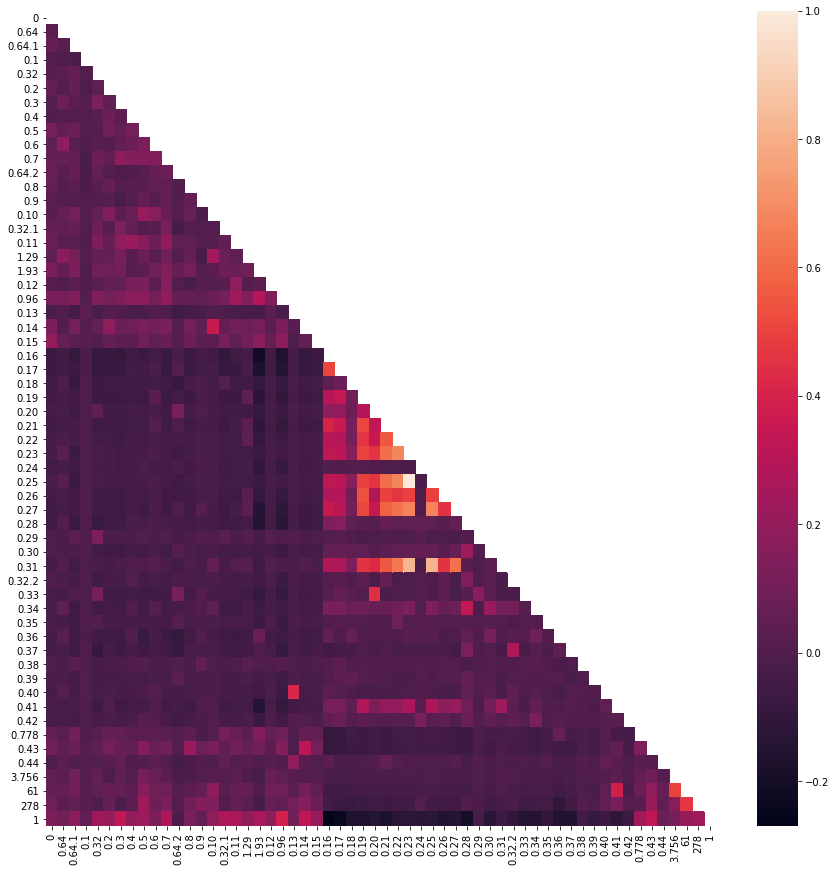

In [53]:
ship = spambase.corr()
mask = np.zeros_like(ship)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(ship, mask=mask)
plt.show()

the correlation between the dependant variable, 0(spam) against the independent variables is weak 

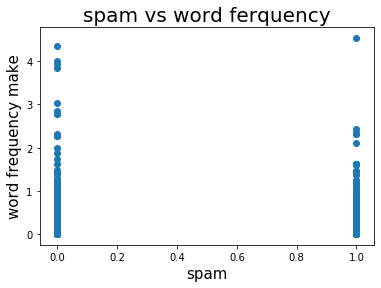

In [54]:
plt.scatter(x='1', y='0', data=spambase)
plt.ylabel('word frequency make', fontsize=15)
plt.xlabel('spam', fontsize=15)
plt.title('spam vs word ferquency', fontsize=20)
plt.show()

there is negative correlation between spam and word frequency make

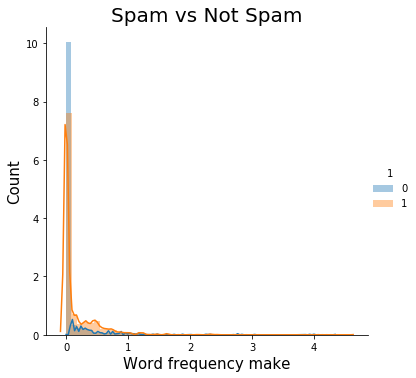

In [55]:
sns.FacetGrid(spambase, hue = '1', height=5).map(sns.distplot, '0').add_legend()
plt.title('Spam vs Not Spam', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Word frequency make',  fontsize=15)
plt.show()
plt.show()

there is more spam data than no spam data in word frequency feature

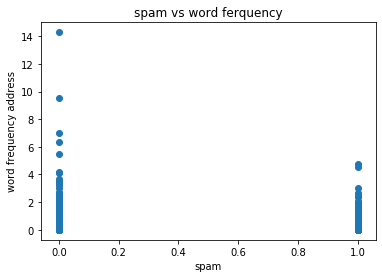

In [56]:
plt.scatter(x='1', y='0.64', data=spambase)
plt.ylabel('word frequency address')
plt.xlabel('spam')
plt.title('spam vs word ferquency')
plt.show()

there is negative correlation betweem word frequency address and spam

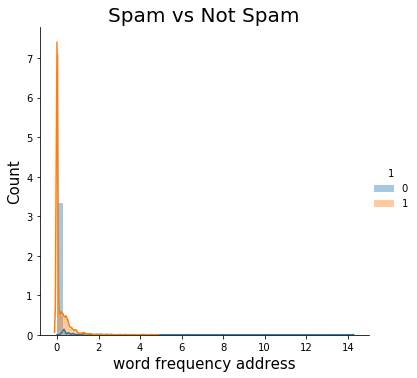

In [57]:
sns.FacetGrid(spambase, hue='1', height=5).map(sns.distplot, '0.64').add_legend()
plt.title('Spam vs Not Spam', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('word frequency address',  fontsize=15)
plt.show()
plt.show()

there is less spam than no spam in word frequency address

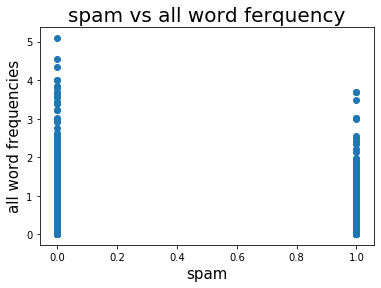

In [58]:
plt.scatter(x='1', y='0.64.1', data=spambase)
plt.ylabel('all word frequencies', fontsize=15)
plt.xlabel('spam', fontsize=15)
plt.title('spam vs all word ferquency', fontsize=20)
plt.show()

there is negative correlation between spam and all word frequencies

In [0]:
sns.FacetGrid(spambase, hue='1', height=5).map(sns.distplot, '0.64.1').add_legend()
plt.title('Spam vs Not Spam', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('all word frequencies',  fontsize=15)
plt.show()


there in more no spam than spam in all word frequencies

In [0]:
plt.scatter(x='1', y='61', data=spambase)
plt.title('smap vs longest capital run length', fontsize=20)
plt.xlabel('spam', fontsize=15)
plt.ylabel('longest capital run length', fontsize=15)
plt.show()

there is positive correlation between spam and longest capital run length

In [0]:
sns.FacetGrid(spambase, hue='1', height=5).map(sns.distplot,'0.64.1').add_legend()
plt.title('Spam vs Not Spam', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('longest capital run length', fontsize=15)
plt.show()

there is more no spam than spam in the longest capital run length feature

In [0]:
plt.scatter(x='1', y='278', data=spambase)
plt.title('spam vs total capital run length', fontsize=20)
plt.xlabel('spam', fontsize=15)
plt.ylabel('total capital run length', fontsize=15)
plt.show()

there is a positive correlation between spam and total capital run length

In [0]:
sns.FacetGrid(spambase, hue='1', height=5).map(sns.distplot,'278').add_legend()
plt.title('Spam vs Not Spam', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('total capital run length',  fontsize=15)
plt.show()
plt.show()

there is more no spam than spam in total capital run length

**Naive Bayes Classifier**

In [0]:
# preparing the data
X = spambase.iloc[:,:-1].values
Y = spambase.iloc[:,-1].values

# separating the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [0]:
# training the data
from sklearn.naive_bayes import GaussianNB as G

classify = G()
classify.fit(X_train, Y_train)

In [0]:
# prediction
Y_pred_naive = classify.predict(X_test)



In [0]:
confusion_matrix(Y_test, Y_pred_naive)

In [0]:
print(classification_report(Y_test, Y_pred_naive))

In [0]:
# splitting the data to 30% for testing and 70% for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

# training
classify.fit(X_train, Y_train)

# prediction
Y_pred_naive2 = classify.predict(X_test)



# confusion_matrix
print('Classification Report:')
print(confusion_matrix(Y_test, Y_pred_naive2))
print('*'*200)

# classification_report
print('Classification Report:')
print(classification_report(Y_test, Y_pred_naive2))


In [0]:
# splitting the data to 40% for testing and 60% for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=0)

# training
classify.fit(X_train, Y_train)

# prediction
Y_pred_naive3 = classify.predict(X_test)



# confusion_matrix
print('Confusion matrix:')
print(confusion_matrix(Y_test, Y_pred_naive3))
print('*'*200)

# classification_report
print('Classification Report:')
print(classification_report(Y_test, Y_pred_naive3))

In [0]:
# splitting the data to 50% for testing and 50% for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5, random_state=0)

# training
classify.fit(X_train, Y_train)

# prediction
Y_pred_naive4 = classify.predict(X_test)

# accuracy
print('Accuracy:')
print(accuracy_score(Y_test, Y_pred_naive4))
print('*'*200)

# confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred_naive4))
print('*'*200)

# classification_report
print('Classification Report:')
print(classification_report(Y_test, Y_pred_naive4))

In [0]:

accuracy_score(Y_test, Y_pred_naive)

print('Accuracy:')
print(accuracy_score(Y_test, Y_pred_naive2))
print('*'*200)
# accuracy
print('Accuracy:')
print(accuracy_score(Y_test, Y_pred_naive4))
print('*'*200)
# accuracy
print('Accuracy:')
print(accuracy_score(Y_test, Y_pred_naive4))
print('*'*200)

## 8. Challenging the solution